In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/dtplay.csv")
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['outlook', 'temp', 'humidity', 'windy','play']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)

# Print head
#
df.head()


,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [ ]:
X = df[['outlook', 'temp', 'humidity', 'windy']].values
y = df["play"]

model= DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
model.predict([[0,0,0,1]])

array([1])

In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
import collections
data_feature_names=['outlook', 'temp', 'humidity', 'windy']
dot_data = tree.export_graphviz(model,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('red', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

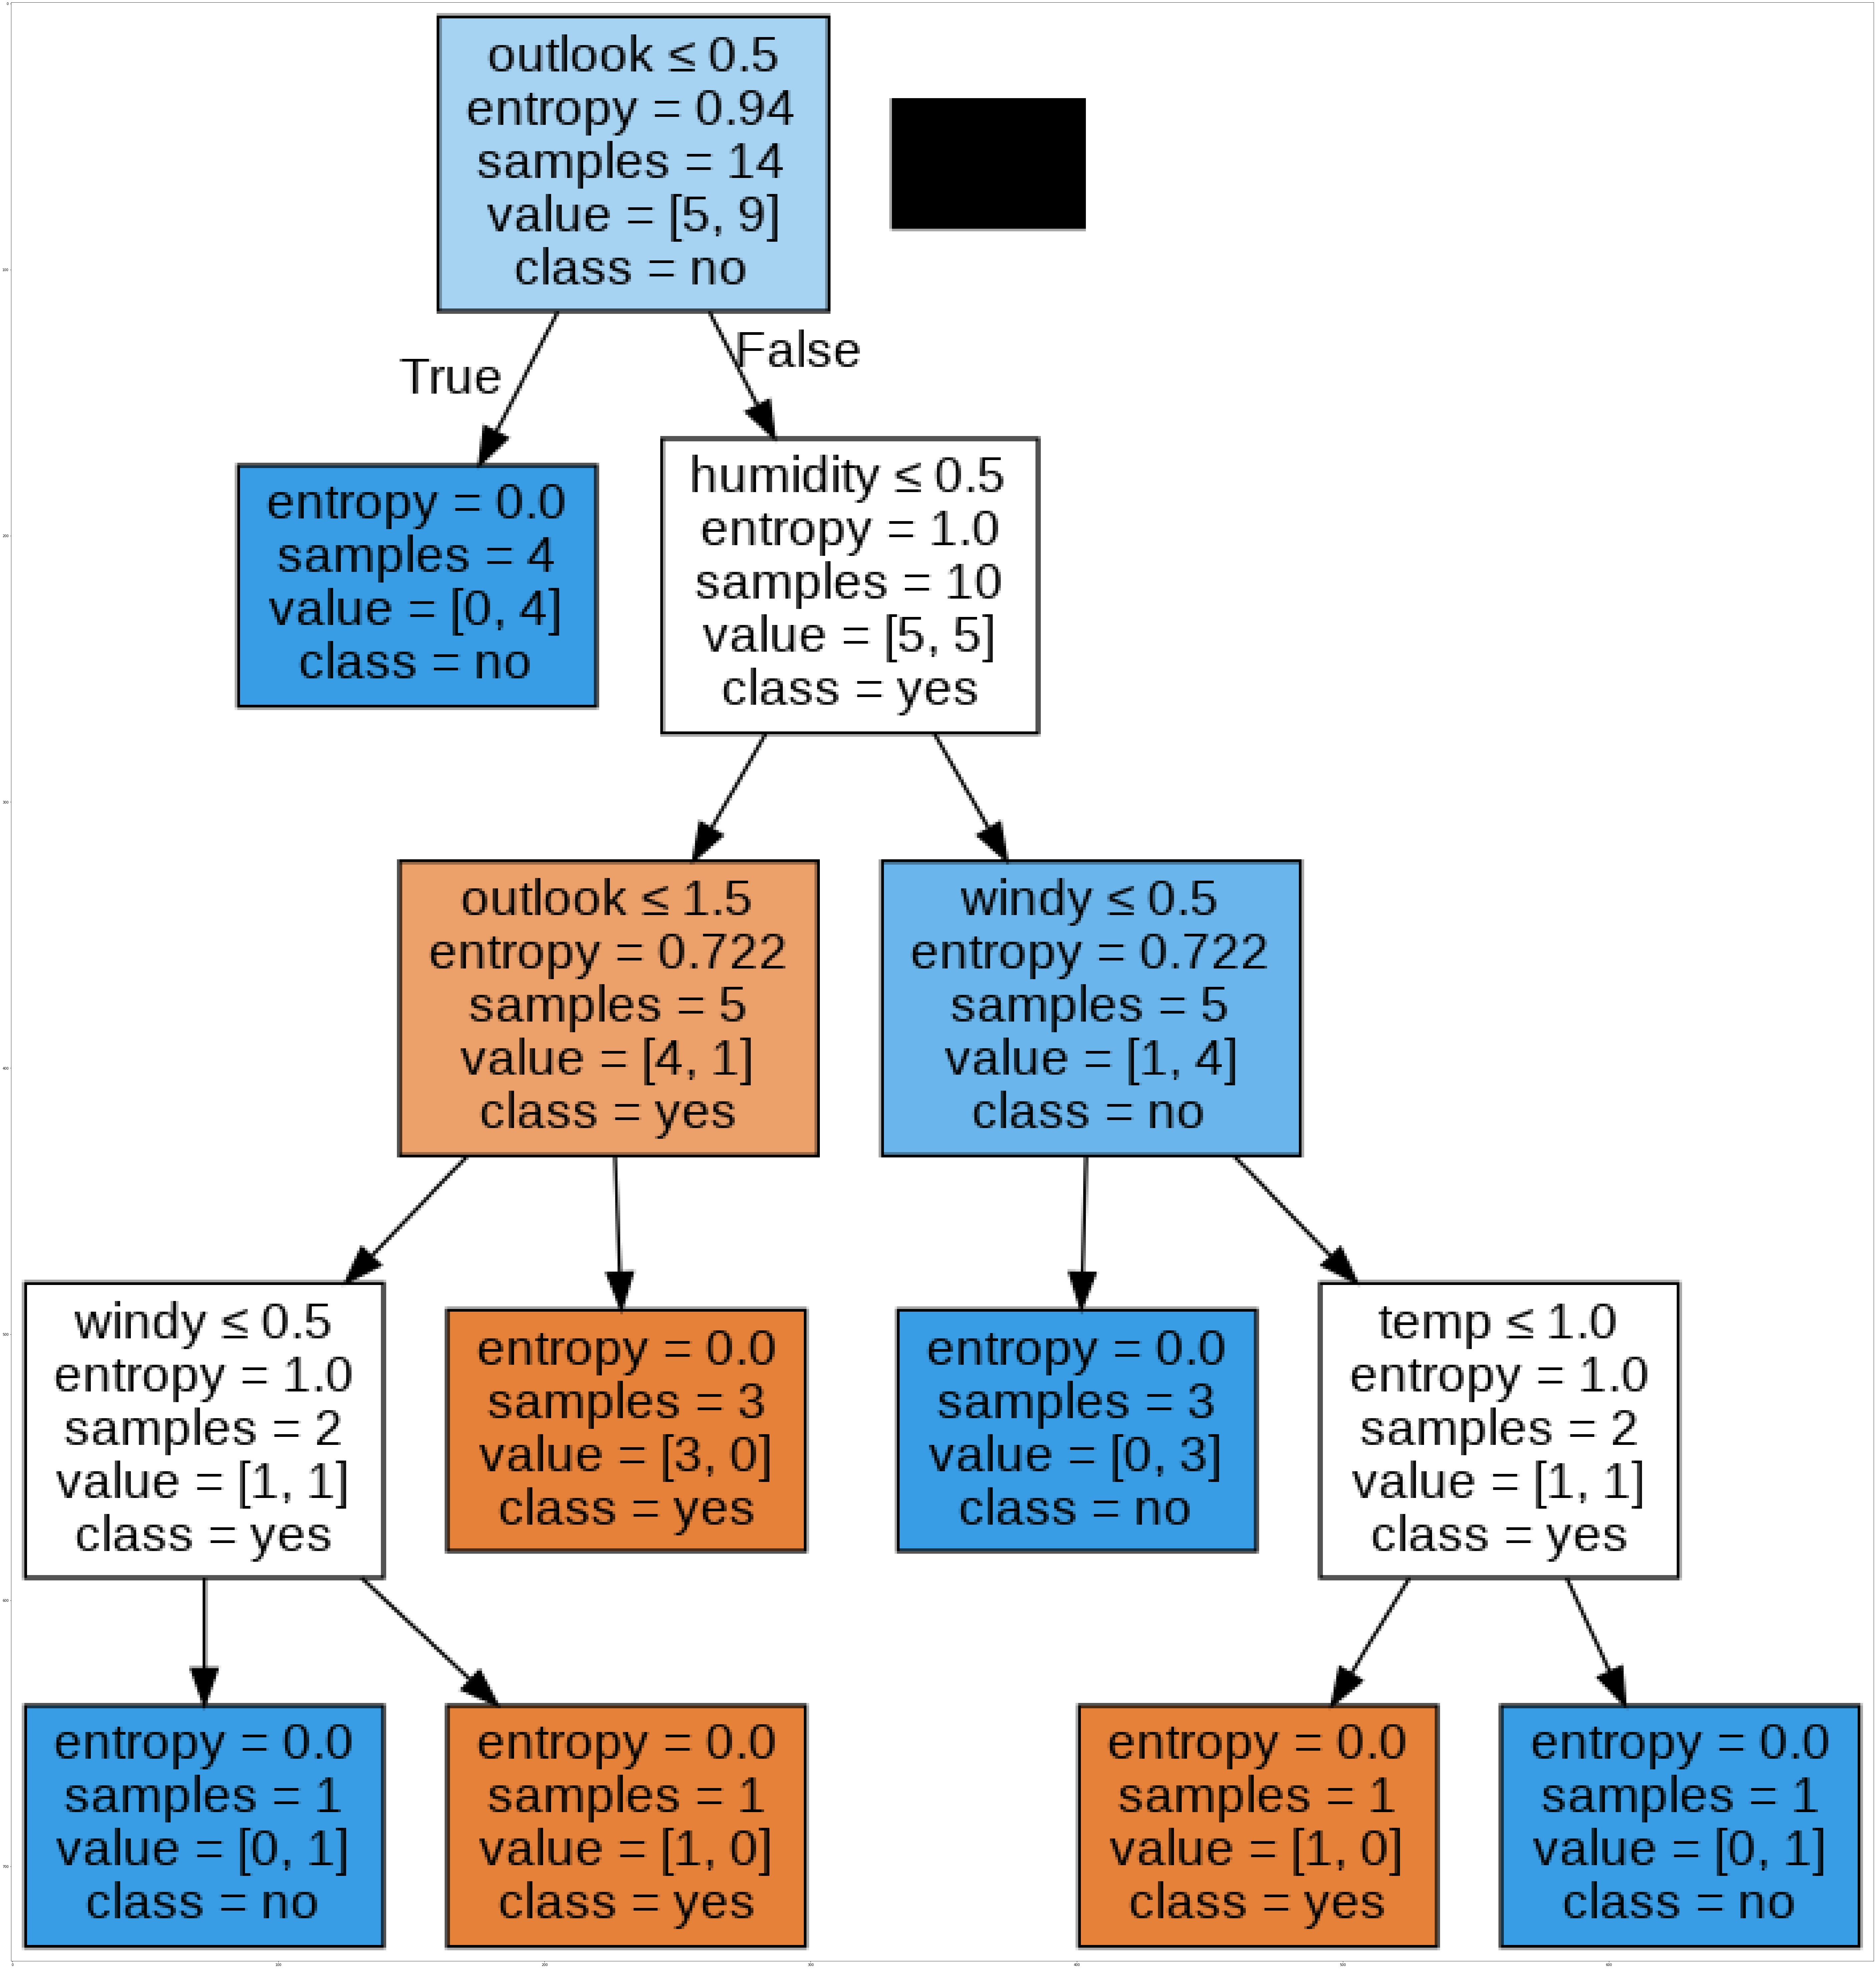

In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "drugtree.png"
featureNames = ['outlook', 'temp', 'humidity', 'windy']
#targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names=['yes','no'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')